# Figure 3

Mean correlation of reconstruction to truth on A) monthly, B) sub-decadal, and C) decadal time scales across the 100 ensemble members with the global average shown on top. The standard deviation of the correlation across the 100 ensemble members on D) monthly, E) sub-decadal, and F) decadal time scales. The pattern correlation between the mean and standard deviation is shown between each pair of maps. These high inverse correlations indicate that if the reconstruction has high fidelity for a timescale and location, this tends to be true across all 100 ensemble members. 

In [2]:
%matplotlib inline
%config InlineBackend.figure_format = 'png'
%config InlineBackend.print_figure_kwargs = {'dpi':300, 'bbox_inches': 'tight'}
import numpy as np
import pandas as pd
import xarray as xr
import xarray.ufuncs as xu
import cmocean as cm
from scipy import stats
import matplotlib.pyplot as plt
import matplotlib as mpl
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import os

In [3]:
%run _define_model_class.ipynb
%run _define_plotting_class.ipynb

In [4]:
dir_raw = '/local/data/artemis/workspace/gloege/SOCAT-LE/data/raw/'
dir_clean = '/local/data/artemis/workspace/gloege/SOCAT-LE/data/clean/'
dir_figs = '/local/data/artemis/workspace/gloege/SOCAT-LE/results/figures_MS'

In [5]:
ds_stats = xr.open_mfdataset(f'{dir_clean}/CO2_flux_stats/stats_FCO2_*_SOMFFN.nc', 
                             combine='nested', 
                             concat_dim='ensemble')

In [6]:
print(plt.style.available)

['seaborn-paper', 'seaborn-pastel', 'seaborn-talk', 'seaborn-white', 'seaborn-whitegrid', 'tableau-colorblind10', 'Solarize_Light2', '_classic_test', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn-bright', 'seaborn-colorblind', 'seaborn-dark-palette', 'seaborn-dark', 'seaborn-darkgrid', 'seaborn-deep', 'seaborn-muted', 'seaborn-notebook', 'seaborn-poster', 'seaborn-ticks', 'seaborn']


# A. Correlation

/home/gloege/.conda/envs/tensorflow/lib/python3.7/site-packages/dask/array/numpy_compat.py:40: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)
/home/gloege/.conda/envs/tensorflow/lib/python3.7/site-packages/dask/array/numpy_compat.py:40: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)
/home/gloege/.conda/envs/tensorflow/lib/python3.7/site-packages/dask/array/numpy_compat.py:40: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)


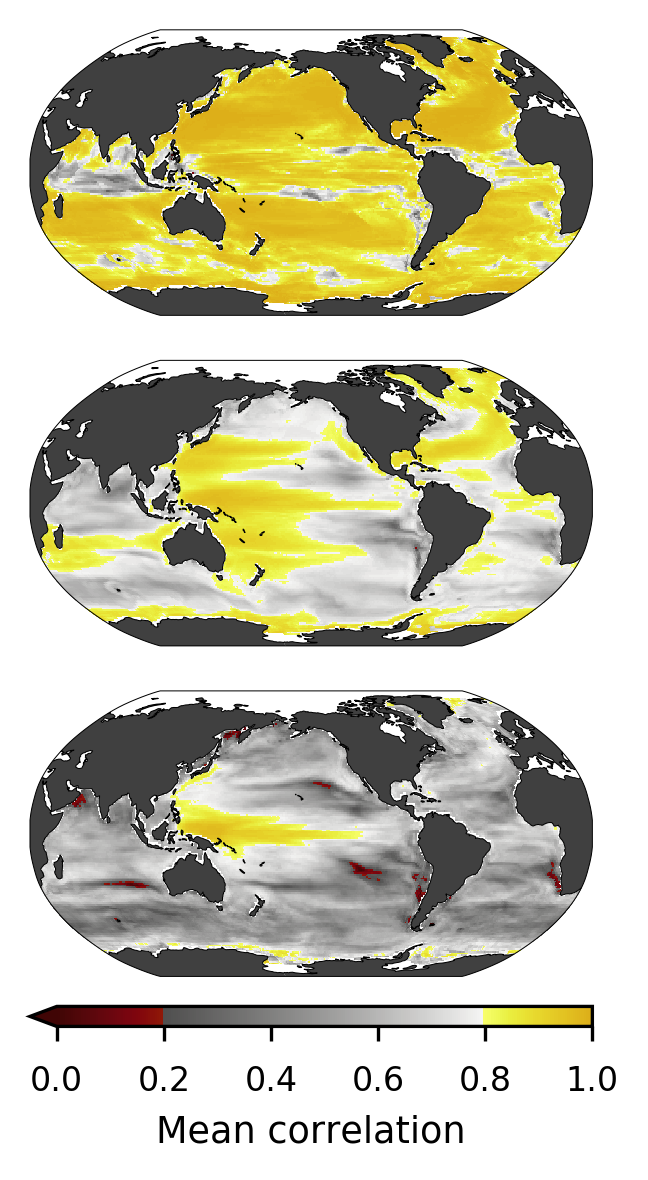

In [5]:
plot_style = 'seaborn-paper'

with plt.style.context(plot_style):
    # Setup Figure
    fig = plt.figure(dpi=300) 
    worldmap = SpatialMap2(fig=fig, region='world',
                   cbar_mode='edge',
                   axes_pad=0.15,
                   colorbar=True,
                   cbar_location='bottom',
                   nrows_ncols=[3,1])
    
    # Colorbar ranges
    vrange_col1 = [0, 1, 0.2]
    cmap_col1 = cm.cm.oxy
    
    ##-----------------------------------------------------
    ## Ensemble mean
    ##-----------------------------------------------------
    # Correlation - Annual-variation
    data = ds_stats['corr_seasonal'].mean('ensemble')
    data = xr_add_cyclic_point(data, cyclic_coord='lon')
    sub0 = worldmap.add_plot(lon=data['lon'], lat=data['lat'], data=data, 
                            vrange=vrange_col1[0:2], cmap=cmap_col1, ax=0)
    
    
    # Correlation - sub-decadal
    data = ds_stats['corr_residual'].mean('ensemble')
    data = xr_add_cyclic_point(data, cyclic_coord='lon')
    sub2 = worldmap.add_plot(lon=data['lon'], lat=data['lat'], data=data, 
                            vrange=vrange_col1[0:2], cmap=cmap_col1, ax=1)
    
    # Correlation - decadal
    data = ds_stats['corr_dec'].mean('ensemble')
    data = xr_add_cyclic_point(data, cyclic_coord='lon')
    sub4 = worldmap.add_plot(lon=data['lon'], lat=data['lat'], data=data, 
                            vrange=vrange_col1[0:2], cmap=cmap_col1, ax=2)
    
    #worldmap.set_title(f'SOMFFN/{model}', ax=0)
    # add colorbar
    col1 = worldmap.add_colorbar(sub0, ax=0, extend='min')
    worldmap.set_cbar_xlabel(col1, f'Mean correlation')
    worldmap.set_ticks(col1, vrange_col1[0], vrange_col1[1], vrange_col1[2])

# B Standard Deviation

/home/gloege/.conda/envs/tensorflow/lib/python3.7/site-packages/dask/array/numpy_compat.py:40: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)
/home/gloege/.conda/envs/tensorflow/lib/python3.7/site-packages/dask/array/numpy_compat.py:40: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)
/home/gloege/.conda/envs/tensorflow/lib/python3.7/site-packages/dask/array/numpy_compat.py:40: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)


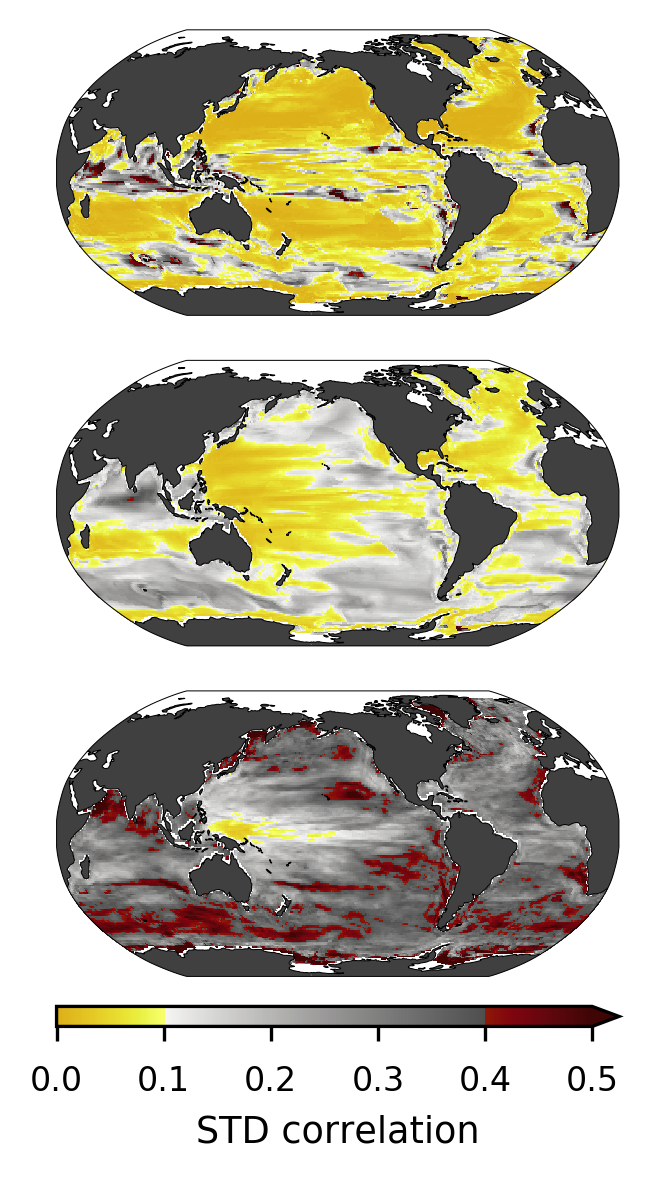

In [6]:
plot_style = 'seaborn-paper'

with plt.style.context(plot_style):
    # Setup Figure
    fig = plt.figure(dpi=300) 
    worldmap = SpatialMap2(fig=fig, region='world',
                   cbar_mode='edge',
                   axes_pad=0.15,
                   colorbar=True,
                   cbar_location='bottom',
                   nrows_ncols=[3,1])
    
    # Colorbar ranges
    vrange_col1 = [0, 0.5, 0.1]
    cmap_col1 = cm.cm.oxy_r
    
    ##-----------------------------------------------------
    ## Ensemble mean
    ##-----------------------------------------------------
    # Correlation - Annual-variation
    data = ds_stats['corr_seasonal'].std('ensemble')
    data = xr_add_cyclic_point(data, cyclic_coord='lon')
    sub0 = worldmap.add_plot(lon=data['lon'], lat=data['lat'], data=data, 
                            vrange=vrange_col1[0:2], cmap=cmap_col1, ax=0)
    
    
    # Correlation - sub-decadal
    data = ds_stats['corr_residual'].std('ensemble')
    data = xr_add_cyclic_point(data, cyclic_coord='lon')
    sub2 = worldmap.add_plot(lon=data['lon'], lat=data['lat'], data=data, 
                            vrange=vrange_col1[0:2], cmap=cmap_col1, ax=1)
    
    # Correlation - decadal
    data = ds_stats['corr_dec'].std('ensemble')
    data = xr_add_cyclic_point(data, cyclic_coord='lon')
    sub4 = worldmap.add_plot(lon=data['lon'], lat=data['lat'], data=data, 
                            vrange=vrange_col1[0:2], cmap=cmap_col1, ax=2)
    
    # add colorbar
    col1 = worldmap.add_colorbar(sub0, ax=0, extend='max')
    worldmap.set_cbar_xlabel(col1, f'STD correlation')
    worldmap.set_ticks(col1, vrange_col1[0], vrange_col1[1], vrange_col1[2])

# Southern Ocean

In [10]:
ds_stats['corr_dec'].sel(lat=slice(-90,-35)).mean(['lat','lon']).to_dataframe().describe()

,corr_dec
count,100.000000
mean,0.539098
std,0.119258
min,0.231598
25%,0.458834
50%,0.580280
75%,0.629116
max,0.726442


# C. Global averages

## Global average correlations

In [8]:
data = ds_stats['corr_seasonal'].mean(dim='ensemble')
print(f"Monthly avg. corr :  {np.array_str(data.mean(['lon','lat']).values)} +/-\
 {np.array_str(data.std(['lon','lat']).values)}")

Monthly avg. corr :  0.8888738747770343 +/- 0.09938329072506967


/home/gloege/.conda/envs/tensorflow/lib/python3.7/site-packages/dask/array/numpy_compat.py:40: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)
/home/gloege/.conda/envs/tensorflow/lib/python3.7/site-packages/dask/array/numpy_compat.py:40: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)


In [9]:
data = ds_stats['corr_residual'].mean(dim='ensemble')
print(f"Subdec avg. corr :  {np.array_str(data.mean(['lon','lat']).values)} +/-\
 {np.array_str(data.std(['lon','lat']).values)}")

Subdec avg. corr :  0.7589567867924468 +/- 0.10083313558115085


/home/gloege/.conda/envs/tensorflow/lib/python3.7/site-packages/dask/array/numpy_compat.py:40: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)
/home/gloege/.conda/envs/tensorflow/lib/python3.7/site-packages/dask/array/numpy_compat.py:40: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)


In [10]:
data = ds_stats['corr_dec'].mean(dim='ensemble')
print(f"dec avg. corr :  {np.array_str(data.mean(['lon','lat']).values)} +/-\
 {np.array_str(data.std(['lon','lat']).values)}")

dec avg. corr :  0.5776897760307911 +/- 0.14829428350612925


/home/gloege/.conda/envs/tensorflow/lib/python3.7/site-packages/dask/array/numpy_compat.py:40: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)
/home/gloege/.conda/envs/tensorflow/lib/python3.7/site-packages/dask/array/numpy_compat.py:40: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)


## Global average standard deviations

In [22]:
data = ds_stats['corr_seasonal'].std(dim='ensemble')
print(f"Monthly avg. corr STD :  {np.array_str(data.mean(['lon','lat']).values)} +/-\
 {np.array_str(data.std(['lon','lat']).values)}")

/home/gloege/.conda/envs/tensorflow/lib/python3.7/site-packages/dask/array/numpy_compat.py:40: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)
/home/gloege/.conda/envs/tensorflow/lib/python3.7/site-packages/dask/array/numpy_compat.py:40: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)


Monthly avg. corr STD :  0.09603966519687848 +/- 0.09752434753329559


In [23]:
data = ds_stats['corr_residual'].std(dim='ensemble')
print(f"Subdec avg. corr STD :  {np.array_str(data.mean(['lon','lat']).values)} +/-\
 {np.array_str(data.std(['lon','lat']).values)}")

/home/gloege/.conda/envs/tensorflow/lib/python3.7/site-packages/dask/array/numpy_compat.py:40: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)
/home/gloege/.conda/envs/tensorflow/lib/python3.7/site-packages/dask/array/numpy_compat.py:40: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)


Subdec avg. corr STD :  0.12755136813992263 +/- 0.06603193844767223


In [24]:
data = ds_stats['corr_dec'].std(dim='ensemble')
print(f"Dec avg. corr STD :  {np.array_str(data.mean(['lon','lat']).values)} +/-\
 {np.array_str(data.std(['lon','lat']).values)}")

/home/gloege/.conda/envs/tensorflow/lib/python3.7/site-packages/dask/array/numpy_compat.py:40: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)
/home/gloege/.conda/envs/tensorflow/lib/python3.7/site-packages/dask/array/numpy_compat.py:40: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)


Dec avg. corr STD :  0.3287249947672683 +/- 0.08983297808162527


# D. Pattern correlations

In [11]:
#for stat in ['corr_av', 'corr_subdec', 'corr_dec', 'bias']:
for time in ['_seasonal', '_residual', '_dec']:
    ## Mean 
    data_mn = ds_stats[f'corr{time}'].mean('ensemble')
    
    ## Standard deviation
    data_std = xu.fabs(ds_stats[f'corr{time}']).std('ensemble')
    
    ## Correlation
    corr = scipy.stats.pearsonr(data_mn.stack(z=('lat','lon')).dropna(dim='z'),
                                data_std.stack(z=('lat','lon')).dropna(dim='z'))

    ## Print result
    print(f'{time} :  {corr[0]:.3}')

/home/gloege/.conda/envs/tensorflow/lib/python3.7/site-packages/dask/array/numpy_compat.py:40: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)
/home/gloege/.conda/envs/tensorflow/lib/python3.7/site-packages/dask/array/numpy_compat.py:40: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)
/home/gloege/.conda/envs/tensorflow/lib/python3.7/site-packages/dask/array/numpy_compat.py:40: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)
/home/gloege/.conda/envs/tensorflow/lib/python3.7/site-packages/dask/array/numpy_compat.py:40: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)


_seasonal :  -0.867


/home/gloege/.conda/envs/tensorflow/lib/python3.7/site-packages/dask/array/numpy_compat.py:40: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)
/home/gloege/.conda/envs/tensorflow/lib/python3.7/site-packages/dask/array/numpy_compat.py:40: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)
/home/gloege/.conda/envs/tensorflow/lib/python3.7/site-packages/dask/array/numpy_compat.py:40: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)
/home/gloege/.conda/envs/tensorflow/lib/python3.7/site-packages/dask/array/numpy_compat.py:40: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)


_residual :  -0.768


/home/gloege/.conda/envs/tensorflow/lib/python3.7/site-packages/dask/array/numpy_compat.py:40: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)
/home/gloege/.conda/envs/tensorflow/lib/python3.7/site-packages/dask/array/numpy_compat.py:40: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)


_dec :  -0.661


/home/gloege/.conda/envs/tensorflow/lib/python3.7/site-packages/dask/array/numpy_compat.py:40: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)
/home/gloege/.conda/envs/tensorflow/lib/python3.7/site-packages/dask/array/numpy_compat.py:40: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)
